# Machine Learning: Assignment 3
## Decision Tree and Naive Bayes classification methods  (max. 10p)

In [1]:
# Write Your information in here
student_name = 'Phat Vuong'
student_email = "ac4933@student.jamk.fi"

In this assignment, we will build a diabetes prediction model.

We try to predict the occurrence of diabetes using the following three ML classification methods:
1. Decision Tree
2. Gaussian Naive Bayes
3. kNN

**Dataset**:

You can download the data from the following link: [https://www.kaggle.com/uciml/pima-indians-diabetes-database](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

Description of the data: *The objective of the dataset is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset.
Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.*


## Assignment 3.1: Data preprocessing (1 p)

First, let's load the required Pima Indian Diabetes dataset into Pandas as CSV data.
You should use and name all the columns and drop the `label` column.

In [3]:
# TODO: preprocessing data

import pandas as pd

# Load the dataset
url = 'https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv'
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [92]:
# Drop the label column
df_features = df.drop(columns=['Outcome'])

# Display the first few rows of the features DataFrame
df_features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


## Assignment 3.2: Decision Tree Classifier (3 p)

Try to predict the `label` value of the feature using other features with
1. Decision Tree,
2. Gaussian Naive Bayes and
3. kNN methods.

Split the data into training data and test data by split *80%/20%*.

Print the accuracy of the prediction, the confusion matrix and
how much different features affect the predicted variable according to the model (the importance of features).

Select the tree most important explanatory variables and print a scatter plot from them.

First implement the **Decision Tree classifier**.
* Let's divide the data into training and testing data sets and scale the numerical data.
* Then train with training data and test with testing data and get the accuracy of the model.

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Split dataset into features (X) and label (y)
X = df_features
y = df['Outcome']

# TODO: Split the dataset (80/20%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Build a machine learning model with Decision Tree and test the model.

In [94]:
# TODO: Build and test the Model

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test_scaled)

# Compute accuracy
acc_dt = accuracy_score(y_test, y_pred_dt)

# TODO: Print accuracy of the model
print(f'Accuracy of Decision Tree: {round(acc_dt*100, 1)} %.')

Accuracy of Decision Tree: 72.1 %.


Let's 
* show the confusion matrix and
* print the importance of features.

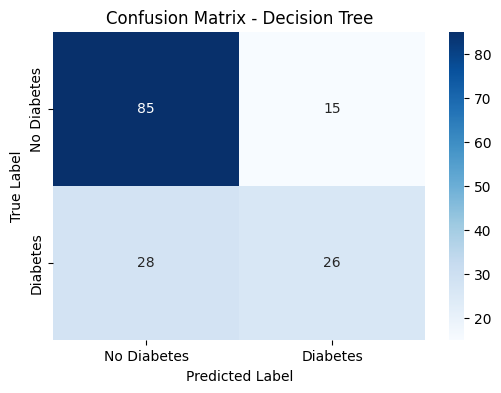

In [95]:
# TODO: Show the confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [96]:
# TODO: print the importance of features
feature_importance = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance (Decision Tree):\n", feature_importance)


Feature Importance (Decision Tree):
 Glucose                     0.330161
BMI                         0.183983
Age                         0.113676
Pregnancies                 0.106096
BloodPressure               0.091016
DiabetesPedigreeFunction    0.090037
Insulin                     0.058731
SkinThickness               0.026301
dtype: float64


Try to do some suitable visualization of the data.

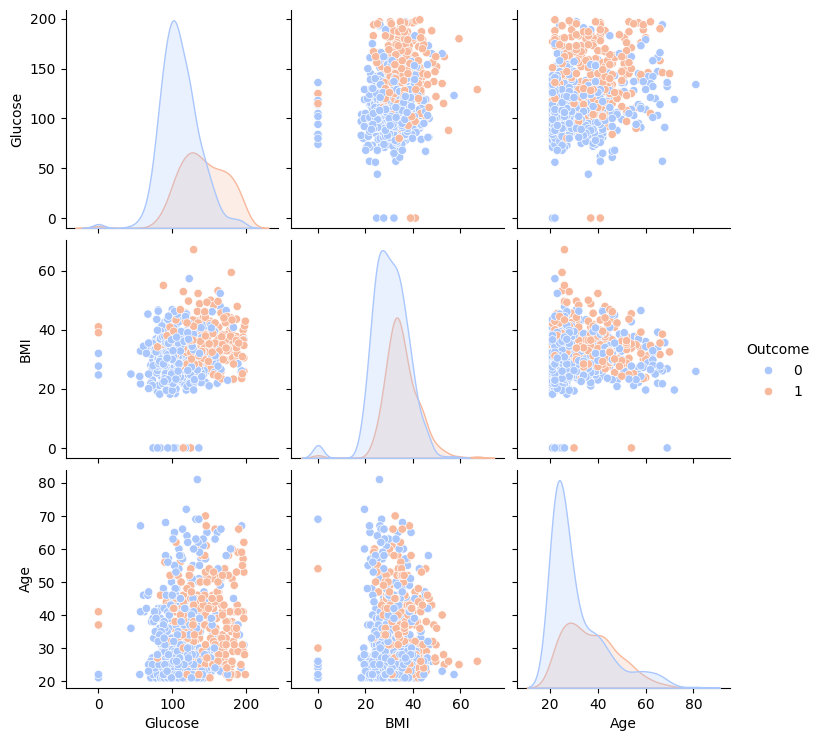

In [97]:
# TODO: Visualization
# Scatter plot of the top 3 features
sns.pairplot(df_top_features, hue='Outcome', diag_kind='kde', palette="coolwarm")
plt.show()

## Assignment 3.3: Naive Gaussian classifier (2 p)
Second implement of a machine learning classification model is the **Naive Gaussian classifier**.

* Let's divide the data into training and testing data sets and scale the numerical data.
* Then train with training data and test with testing data and get the accuracy of the model.



In [98]:
from sklearn.naive_bayes import GaussianNB

# Split dataset into features (X) and label (y)
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# TODO: Split the dataset (80/20%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# TODO: Build and test the Model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test_scaled)

# Compute accuracy
acc_nb = accuracy_score(y_test, y_pred_nb)

# TODO: Print accuracy of the model
print(f'Accuracy of Naive Bayes: {round(acc_nb*100, 1)} %.')

Accuracy of Naive Bayes: 70.8 %.


Now let's do Processing of results (naive Gaussian method) and show confusion matrix.

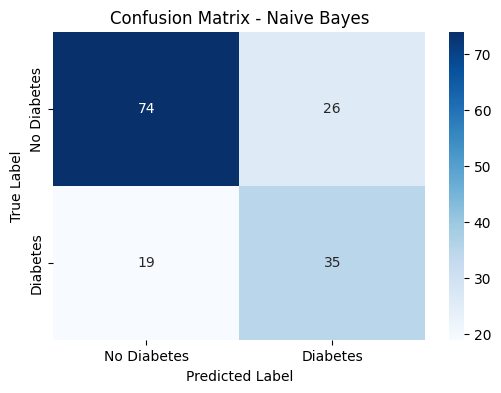

In [99]:
# TODO: Show the confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## Assignment 3.4: kNN (2 p)

The third implement of a machine learning classification model is the **kNN classifier**.

* Let's divide the data into training and testing data sets and scale the numerical data.
* Then train with training data and test with testing data and get the accuracy of the model.

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# TODO: Split the dataset (80/20%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# TODO: Build and test the Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test_scaled)

# Compute accuracy
acc_knn = accuracy_score(y_test, y_pred_knn)

# TODO: Print accuracy of the model
print(f'Accuracy of kNN: {round(acc_knn*100, 1)} %.')

Accuracy of kNN: 70.1 %.


Processing of results (kNN method) and show confusion matrix.

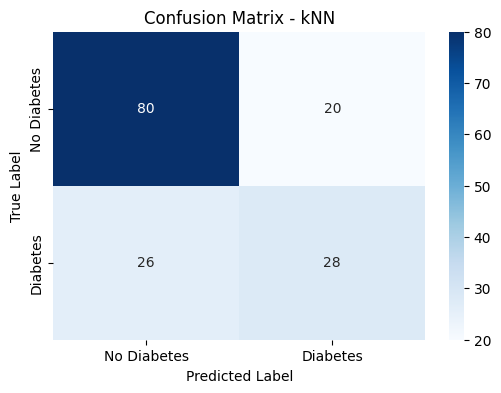

In [101]:
# TODO: show confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title("Confusion Matrix - kNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Assignment 3.5: Plotting the ROC curve (2p)

Also draw the ROC curves (with AUC) with three classification methods implemented:
1. decision tree
2. Gaussian
3. kNN

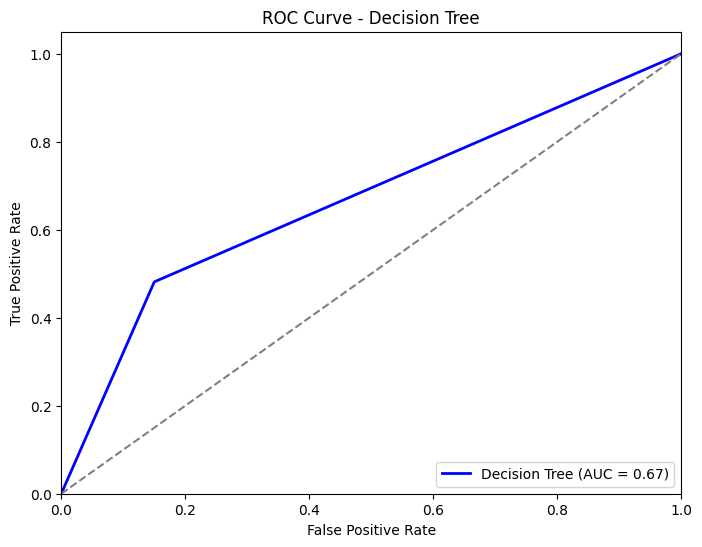

In [102]:
# TODO: ROC for decision tree

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Get probability estimates for the positive class (Diabetes = 1)
y_probs_dt = dt_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC score
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_probs_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier baseline
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

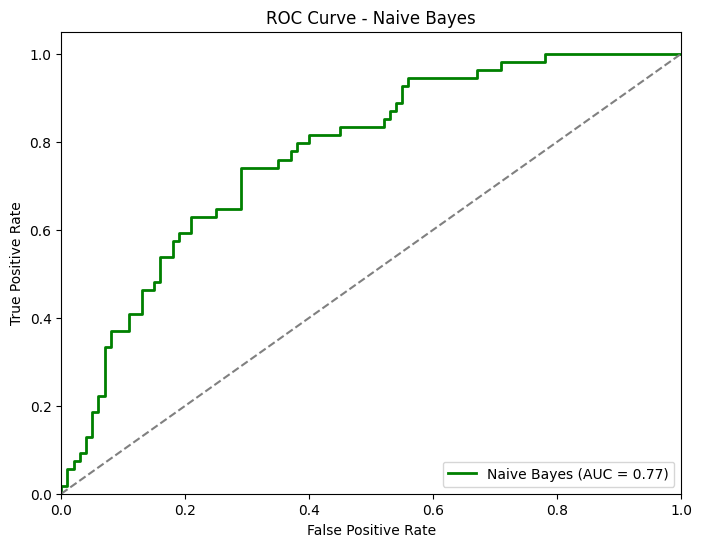

In [105]:
# TODO: ROC for Naive Gaussian
# Train the Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Get probability estimates for the positive class (Diabetes = 1)
y_probs_nb = nb_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC score
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_probs_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='green', lw=2, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier baseline
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc="lower right")
plt.show()

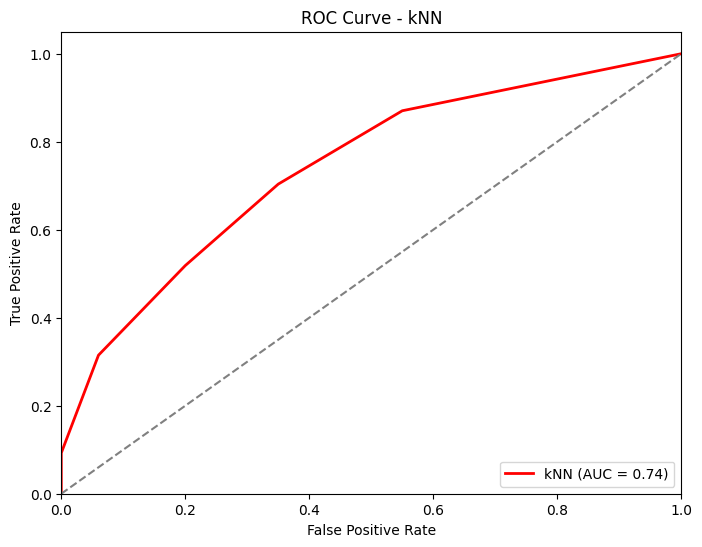

In [106]:
# TODO: ROC for kNN
# Train the kNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Get probability estimates for the positive class (Diabetes = 1)
y_probs_knn = knn_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC score
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_probs_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='red', lw=2, label=f'kNN (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier baseline
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - kNN')
plt.legend(loc="lower right")
plt.show()


### Conclusion
* TODO: Write comparison and conclusion of the results you got.

* <font color="red">PLEASE WRITE YOUR EXPLANATION HERE.</font>

## From the ROC Curves and AUC scores, we observe that:
- **Naive Bayes performed the best (AUC = 0.77)**, indicating that it has the best discrimination ability among the three models.
- **kNN performed slightly worse than Naive Bayes (AUC = 0.74)**, showing it is a competitive model but not as strong as Naive Bayes
- **Decision Tree had the lowest AUC (0.67)**, suggesting it is the least effective model for this dataset.